In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
# Enable altair's interactive visualization in jupyter notebook
alt.renderers.enable('notebook')
# Enable altair's local data server so notebook size doesn't get too large
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [3]:
alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [4]:
df = pd.read_csv('data/master.csv')

In [5]:
df.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN


In [6]:
summer_df = df[df['Season'] == 'Summer']
winter_df = df[df['Season'] == 'Winter']

In [7]:
summer_medal = summer_df[summer_df['Medal'].notnull()]

In [8]:
summer_medal_sorted = summer_medal.groupby(['Name', 'region'])['Medal'].size().reset_index(name='count_medals').sort_values(by='count_medals', ascending=False)
summer_medal_sorted.head(10)

,Name,region,count_medals
15807,"Michael Fred Phelps, II",USA,28
13378,Larysa Semenivna Latynina (Diriy-),Russia,18
16936,Nikolay Yefimovich Andrianov,Russia,15
5294,Edoardo Mangiarotti,Italy,13
21300,Takashi Ono,Japan,13
2778,Borys Anfiyanovych Shakhlin,Russia,13
4421,"Dara Grace Torres (-Hoffman, -Minas)",USA,12
19794,Ryan Steven Lochte,USA,12
20089,Sawao Kato,Japan,12
16552,Natalie Anne Coughlin (-Hall),USA,12


In [9]:
summer_medal_top = summer_medal_sorted.head(25)

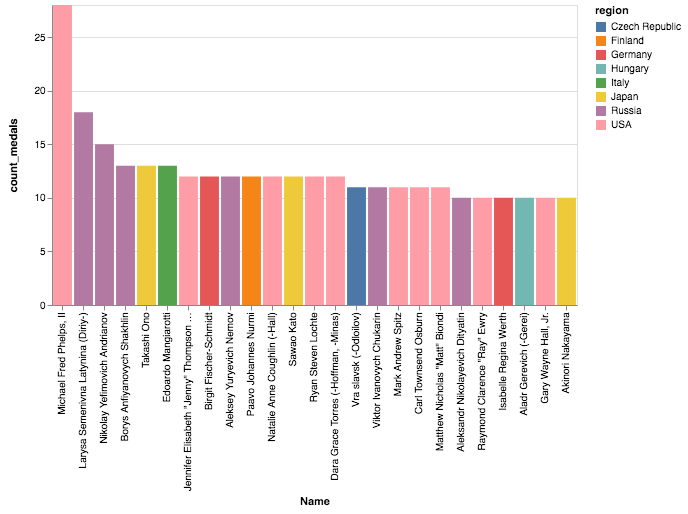

In [10]:
alt.Chart(summer_medal_top).mark_bar().encode(
    alt.X('Name:N', sort=alt.Sort(field='count_medals', op='sum', order='descending')),
    alt.Y('count_medals:Q'),
    alt.Color('region:N')
)

In [11]:
basketball_medal = summer_medal[summer_medal['Sport'] == 'Basketball']

In [12]:
basketball_medal['Event'].unique()

array(["Basketball Men's Basketball", "Basketball Women's Basketball"],
      dtype=object)

In [13]:
men_basketball_medal = basketball_medal[basketball_medal['Event'] == "Basketball Men's Basketball"]
women_basketball_medal = basketball_medal[basketball_medal['Event'] == "Basketball Women's Basketball"]

In [14]:
chart1 = alt.Chart(men_basketball_medal).mark_rect().encode(
    alt.Y('region:N', title='Country'),
    alt.X('Year:O', title='Year'),
    alt.Color('Medal:N', sort=['Gold','Silver', 'Bronze'], scale=alt.Scale(
            domain=['Gold', 'Silver', 'Bronze'],
            range=['#FFD700	', '#C0C0C0', '#cd7f32']), legend=alt.Legend(
            title="Medal"))
)

In [15]:
chart1 = chart1.properties(title="Men's Basketball Medal Winners in the Summer Olympics")
chart1 = chart1.configure(title = alt.VgTitleConfig(fontSize=12, offset=10))
chart1 = chart1.configure_legend(titleFontSize=8)
chart1 = chart1.configure_axis(titleFontSize=10)

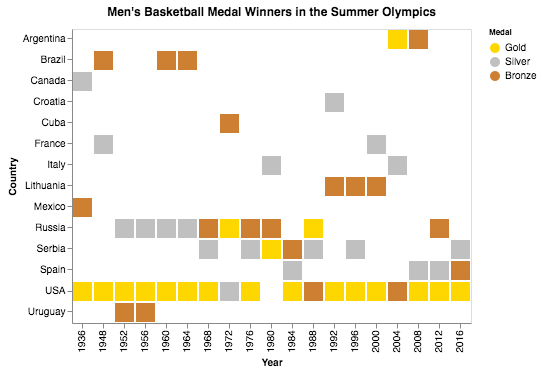

In [16]:
chart1

In [24]:
chart1.save('plots/medals/men_basketball.png', scale_factor=7.0)

In [17]:
chart2 = alt.Chart(women_basketball_medal).mark_rect().encode(
    alt.Y('region:N', title='Country'),
    alt.X('Year:O', title='Year'),
    alt.Color('Medal:N', sort=['Gold','Silver', 'Bronze'], scale=alt.Scale(
            domain=['Gold', 'Silver', 'Bronze'],
            range=['#FFD700	', '#C0C0C0', '#cd7f32']), legend=alt.Legend(
            title="Medal"))
)

In [18]:
chart2 = chart2.properties(title="Women's Basketball Medal Winners in the Summer Olympics")
chart2 = chart2.configure(title = alt.VgTitleConfig(fontSize=12, offset=10))
chart2 = chart2.configure_legend(titleFontSize=8)
chart2 = chart2.configure_axis(titleFontSize=10)

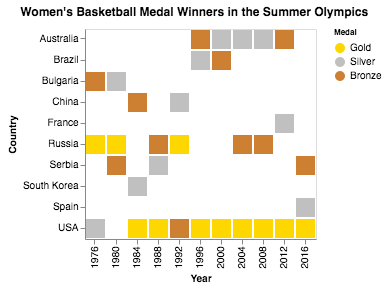

In [19]:
chart2

In [28]:
chart2.save('plots/medals/women_basketball.png', scale_factor=7.0)

In [57]:
test = summer_medal[(summer_medal['region'] == 'USA') | 
                    (summer_medal['region'] == 'Russia') | 
                    (summer_medal['region'] == 'China') |
                   (summer_medal['region'] == 'France') |
                   (summer_medal['region'] == 'UK') |
                   (summer_medal['region'] == 'Germany') |
                   (summer_medal['region'] == 'Italy')]

In [58]:
chart = alt.Chart(test).mark_area().encode(
    alt.X('Year:N', axis = alt.Axis(labelAngle=-45)),
    alt.Y('count(Medal):Q', stack='center', axis=None),
    alt.Color('region:N', title='Region')
)

In [62]:
chart = chart.properties(title='Streamgraph for Summer Olympic Medals - Top 7 Countries')

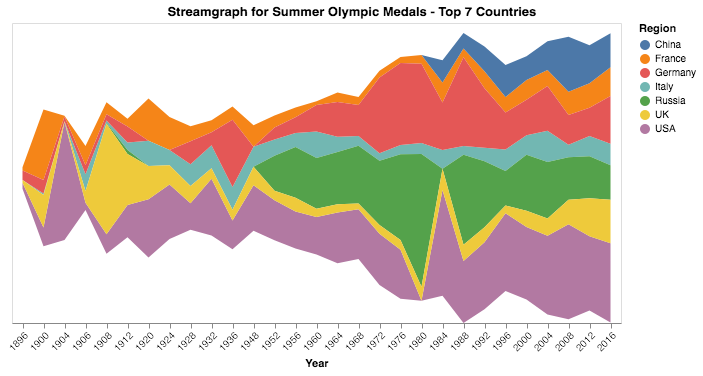

In [63]:
chart

In [64]:
chart.save('plots/medals/streamgraph_top.png', scale_factor=7.0)

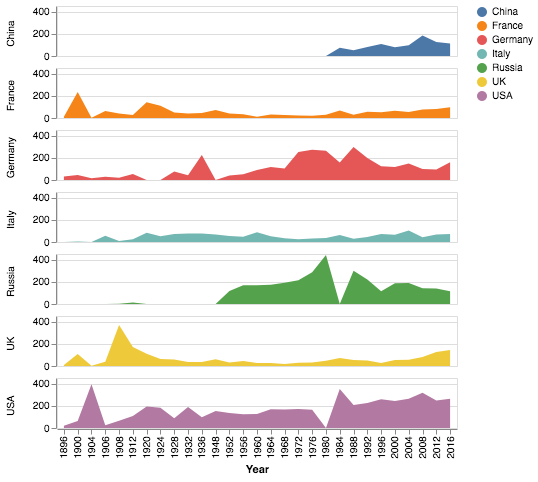

In [65]:
alt.Chart(test).mark_area().encode(
    alt.X('Year:N', axis = alt.Axis(labelAngle=-45)),
    alt.Y('count(Medal):Q', title=''),
    alt.Color('region:N', title='Region'),
    row=alt.Row('region:N', title='')
).properties(height=50, width=400)